In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans    
from scipy.cluster import hierarchy   
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, confusion_matrix, precision_recall_fscore_support, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

C:\Users\rapef\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Predicting Ocular Survival and Success of Treatmeant of Retinoblastoma Patients

## 1. Introduction

Retinoblastoma (Rb) is a rare form of cancer that affects the cells of the retina. Since the retina plays a central role in our vision by translating an optical image into neural impulses, any defects associated with the light-detecting tissue are detremental to the vision. There are two forms of disease - heritable and non-heritable.<br>
This form of cancer affects mostly young children and is caused by a genetic defect in the the RB1 and MYCN genes, which encode for tumor suppressor proteins and transcription factors respectively. <br>
The most common signs of disease are poor vision and an abnormal appearance of the retina. Currently, there are limited treatment options. Primarily, the focus is on eliminating the cancer by chemo- or radiation therapy which in recent years shifted towards plaque brachytherapy, radiation from within, so the insertion of a radioactive metal plaque on the affected area. However, typically, the eye has to be removed completely (called enucleation) to avoid spreading of the cancer to the neighbouring tissues.<br>   
According to the World Health Organization, 1 in 14,000 – 18,000 live births are affected by this disease in the US and Europe, with a higher rate of incidence in Africa, India and members of First Nations. <br>
Due to the complexity of disease and treatment, there are clear benefits when trying to make inferences about the (scarce) data available ranging from early detection to improved therapy options. <br>
Using both supervised and unsupervised learning algorithms, this project aims to answer three questions based on a clinical dataset with sample size of 87 eyes of retinoblastoma patients. The goal is to unveil interesting behaviours or dependencies that could be potentially be used in a healthcare setting. <br>

### 1.1 Description of Dataset

Source: 
https://figshare.com/articles/Total_retinal_detachments_due_to_retinoblastoma_Outcomes_following_intra-arterial_chemotherapy_ophthalmic_artery_chemosurgery/6191927

<p>For this project, I have chosen a dataset that focused on 87 eyes of retinoblastoma patients. Since data, especially in this field, is scare, the dataset is taken from a study conducted by Rowlands et al. (2018). To work easier with the data, I have only included the nine features that I am interested in:
</p>

#1 Age (at inital diagnosis): age_diagnosis
#2 Sex <br>
Possible categories: 0: male, 1: female
#3 Prior treatment: prior_treatment <br>
Possible categories: 0: None, 1: Systemic Chemotherapy, 2: Intra-arterial Chemotherapy, 3: Bridge Chemotherapy  
#4 Family history: family_history <br>
Possible categories: 0: no, 1: yes
#5 Laterality of retinoblastoma: lateral_RB <br>
Possible categories: 1: unilateral, 2: bilateral
#6 Laterality of retinal detachment: lateral_RD <br>
Possible categories: 0: right eye, 1: left eye
#7 Max Retina Reattachment: max_RRA <br>
Possible categories: 0: No resolution, 1: Partial, 2:Complete
#8 Final Retinal Detachment Status: final_RD_status <br>
Possible categories: 0: TRD (Tractional Retinal Detachment), 1: Partial, 2: Complete
#9 Ocular Survival (defined as the time between date of diagnosis and the date of enucleation): ocular_survival <br>

In [2]:
#read in the data as a dataframe
#fill all empty cells with 0
rb = pd.read_csv('RB.csv').fillna(0)

In [3]:
print('Number of Entries:\n')
print('Feature\t\t Count\n%s'%rb.count() )

Number of Entries:

Feature		 Count
age_diagnosis      87
sex                87
prior_treatment    87
family_history     87
lateral_RB         87
lateral_RD         87
max_RRA            87
final_RD_status    87
ocular_survival    87
dtype: int64


In [4]:
print('First 10 entries:')
rb.head(10)

First 10 entries:


,age_diagnosis,sex,prior_treatment,family_history,lateral_RB,lateral_RD,max_RRA,final_RD_status,ocular_survival
0,21.67,1,1,0,2,1,2,2,10.51
1,12.93,1,0,0,1,0,1,1,6.64
2,26.03,0,0,0,2,1,0,0,0.55
3,10.30,1,0,0,1,1,2,2,8.58
4,12.40,1,0,0,1,0,2,2,8.88
5,18.20,0,0,0,2,0,2,1,1.55
6,11.10,1,0,0,1,0,2,2,8.61
7,60.53,1,0,0,1,1,1,1,1.29
8,3.80,1,1,1,2,0,2,2,7.57
9,3.80,1,1,1,2,1,1,1,3.45


In [5]:
print('Last five entries:')
rb.tail(5)

Last five entries:


,age_diagnosis,sex,prior_treatment,family_history,lateral_RB,lateral_RD,max_RRA,final_RD_status,ocular_survival
82,47.00,1,1,0,1,0,0,0,1.32
83,3.77,0,1,0,1,0,2,1,1.30
84,3.87,0,0,0,1,1,2,2,1.00
85,24.63,1,1,0,1,0,0,0,0.77
86,21.43,1,1,0,1,1,0,0,0.61


In [6]:
print('Description of continuous variables:')
rb[['age_diagnosis','ocular_survival']].describe()

Description of continuous variables:


,age_diagnosis,ocular_survival
count,87.000000,87.000000
mean,16.831494,2.826437
std,10.657577,2.107216
min,0.370000,0.360000
25%,9.265000,1.310000
50%,14.300000,2.230000
75%,23.300000,3.735000
max,60.530000,10.510000


## 2. Classification
### Is there a relationship between the age at diagnosis and ocular survival?

The scientific consensus is that with earlier diagnosis there is a higher chance of retaining a patient's vision, since treatment can start before the cancer cells grow and spread to neighbouring tissues. <br> 
The dataset includes patients of various age groups, from a couple of month old babies to 60 year old adults. By looking at both ocular survival and the age at diagnosis, the goal is to see if there is a pattern.

C:\Users\rapef\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


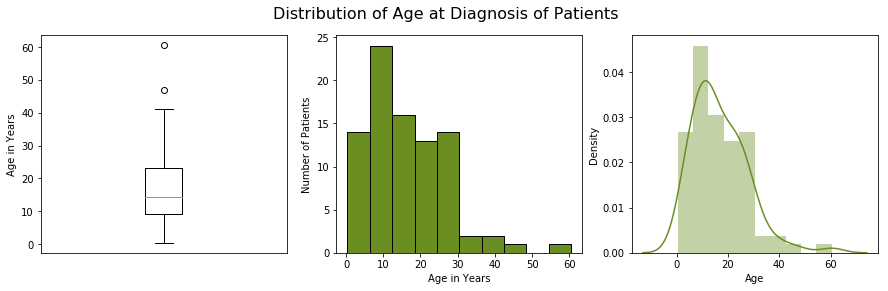

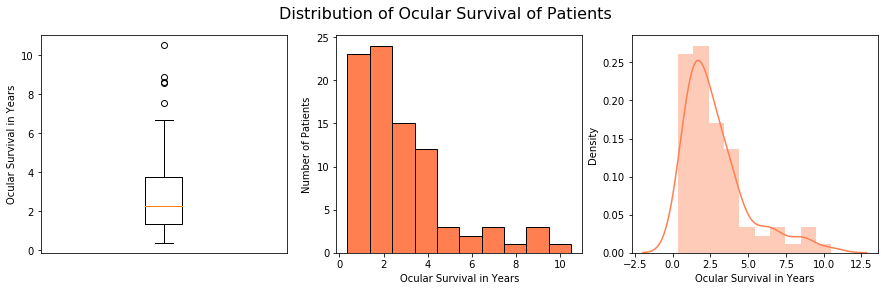

In [7]:
#Diagrams for Age
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
x = np.arange(0, 9, 0.25)
plt.suptitle('Distribution of Age at Diagnosis of Patients',fontsize=16)

axes[0].boxplot(rb['age_diagnosis'])
axes[0].set_ylabel('Age in Years')
axes[0].get_xaxis().set_visible(False)

axes[1].hist(rb['age_diagnosis'], bins = 'auto', color = 'olivedrab', edgecolor = 'black')
axes[1].set_xlabel('Age in Years')
axes[1].set_ylabel('Number of Patients')

sns.distplot(rb['age_diagnosis'], color = 'olivedrab')
plt.xlabel('Age')
plt.ylabel('Density')


#Diagrams for Ocular Survival
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
x = np.arange(0, 9, 0.25)
plt.suptitle('Distribution of Ocular Survival of Patients',fontsize=16)

axes[0].boxplot(rb['ocular_survival'])
axes[0].set_ylabel('Ocular Survival in Years')
axes[0].get_xaxis().set_visible(False)

axes[1].hist(rb['ocular_survival'], bins = 'auto', color = 'coral', edgecolor = 'black')
axes[1].set_xlabel('Ocular Survival in Years')
axes[1].set_ylabel('Number of Patients')

sns.distplot(rb['ocular_survival'], color = 'coral')
plt.xlabel('Ocular Survival in Years')
plt.ylabel('Density')

plt.show()

### 2.1 K-means Clustering

Looking at the graphs of the two variables, it is evident that they seem to show similar patterns of distribution.
Therefore, it would be interesting to find out if there is a relationship between age of diagnosis and the ocular survival (in years). <br>
To this end, I will create a scatterplot and apply K-means clustering, with both k=2 and k=3, to find two and three distinct clusters. Clustering, in this case, can help to find similarities in patients and make inferences about treatment and its success. <br>

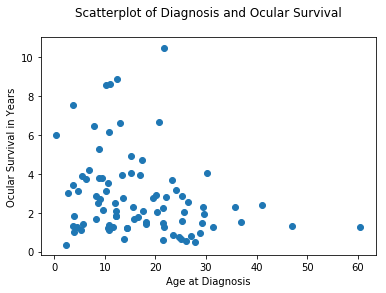

In [8]:
plt.figure()
plt.title('Scatterplot of Diagnosis and Ocular Survival\n')
plt.scatter(rb['age_diagnosis'], rb['ocular_survival'])
plt.xlabel('Age at Diagnosis')
plt.ylabel('Ocular Survival in Years')
plt.show()

In [9]:
#scale feature points
X = rb[['age_diagnosis', 'ocular_survival']]
rb_scaled = pd.DataFrame(scale(X), index = X.index, columns = X.columns)

In [10]:
print('\tApplying K-Means Clustering with K = 2\n')
kMeans1 = KMeans(n_clusters = 2, n_init = 20)
print (kMeans1.fit(rb_scaled) )
print('\nDisplaying labels\n%s' %pd.Series(kMeans1.labels_).value_counts() )
print('\nDisplaying cluster centres\n%s' %kMeans1.cluster_centers_ )
print('\nInertia\n%s' %kMeans1.inertia_ )

	Applying K-Means Clustering with K = 2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Displaying labels
1    48
0    39
dtype: int64

Displaying cluster centres
[[ 0.83378554 -0.50718602]
 [-0.67745075  0.41208864]]

Inertia
106.67468148510454


In [11]:
print('\tApplying K-Keans Clustering with K = 3\n')
np.random.seed(4)
kMeans2 = KMeans(n_clusters = 3, n_init = 20)
print (kMeans2.fit(rb_scaled))
print('\nDisplaying labels\n%s' %pd.Series(kMeans2.labels_).value_counts() )
print('\nDisplaying cluster centres\n%s' %kMeans2.cluster_centers_ )
print('\nInertia\n%s' %kMeans2.inertia_ )

	Applying K-Keans Clustering with K = 3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Displaying labels
2    45
0    29
1    13
dtype: int64

Displaying cluster centres
[[ 1.12124879 -0.50227364]
 [-0.47527734  1.99135261]
 [-0.58528021 -0.25159219]]

Inertia
57.47396884662702


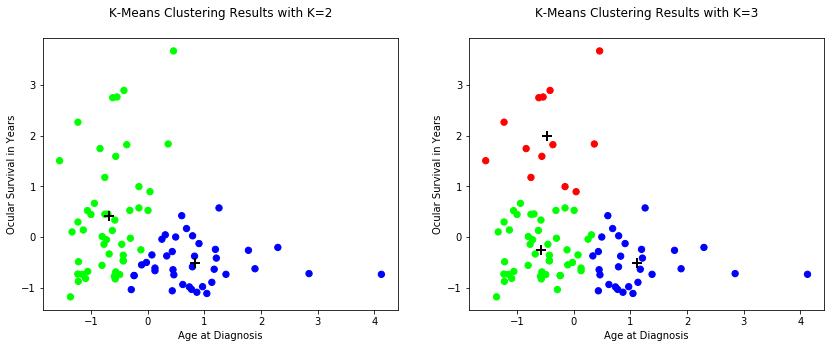

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(rb_scaled['age_diagnosis'], rb_scaled['ocular_survival'], s=40, c=kMeans1.labels_, cmap=plt.cm.brg) 
ax1.set_title('K-Means Clustering Results with K=2\n')
ax1.scatter(kMeans1.cluster_centers_[:,0], kMeans1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)
ax1.set_xlabel('Age at Diagnosis')
ax1.set_ylabel('Ocular Survival in Years')

ax2.scatter(rb_scaled['age_diagnosis'], rb_scaled['ocular_survival'], s=40, c=kMeans2.labels_, cmap=plt.cm.brg) 
ax2.set_title('K-Means Clustering Results with K=3\n')
ax2.scatter(kMeans2.cluster_centers_[:,0], kMeans2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)
ax2.set_xlabel('Age at Diagnosis')
ax2.set_ylabel('Ocular Survival in Years')

plt.show()

### Examining the clusters

Looking at the two plots, it would be interesting to examine the two clusters resulting from K-means with k=2 as a clear trend can be observed. Additionally, the two clusters seem to be of approximately the same size.

In [13]:
#create new dataframe to insert a column cluster and sort it by the cluster it was assigned to
rb1 = rb
rb1['cluster'] = kMeans1.predict(rb_scaled)
rb1.head()

,age_diagnosis,sex,prior_treatment,family_history,lateral_RB,lateral_RD,max_RRA,final_RD_status,ocular_survival,cluster
0,21.67,1,1,0,2,1,2,2,10.51,1
1,12.93,1,0,0,1,0,1,1,6.64,1
2,26.03,0,0,0,2,1,0,0,0.55,0
3,10.30,1,0,0,1,1,2,2,8.58,1
4,12.40,1,0,0,1,0,2,2,8.88,1


In [14]:
rb1 = rb1[['age_diagnosis', 'ocular_survival','cluster']]
print('Displaying the first 5 items from the blue cluster (0)\n', rb1.sort_values(by=['cluster']).head() )
print('\nDisplaying the last 5 items from the green cluster (1)\n', rb1.sort_values(by=['cluster']).tail() )

Displaying the first 5 items from the blue cluster (0)
     age_diagnosis  ocular_survival  cluster
43          41.17             2.40        0
37          24.10             3.18        0
38          28.83             0.96        0
42          20.40             2.05        0
85          24.63             0.77        0

Displaying the last 5 items from the green cluster (1)
     age_diagnosis  ocular_survival  cluster
16           0.37             5.98        1
56           8.67             2.53        1
57          15.57             2.30        1
22          10.60             1.21        1
0           21.67            10.51        1


In [15]:
print(rb1[rb1['cluster']==0].describe().transpose())

                 count       mean      std    min     25%    50%    75%    max
age_diagnosis     39.0  25.666410  9.18131  13.77  20.265  24.63  29.05  60.53
ocular_survival   39.0   1.763846  0.88535   0.50   1.240   1.55   2.30   4.03
cluster           39.0   0.000000  0.00000   0.00   0.000   0.00   0.00   0.00


In [16]:
print(rb1[rb1['cluster']==1].describe().transpose())

                 count      mean       std   min    25%   50%      75%    max
age_diagnosis     48.0  9.653125  4.720685  0.37  5.615  9.93  12.2700  21.67
ocular_survival   48.0  3.689792  2.406868  0.36  1.840  3.11   4.7525  10.51
cluster           48.0  1.000000  0.000000  1.00  1.000  1.00   1.0000   1.00


### Interpretation

The first cluster (cluster 0, blue) represents the group of patients with low ocular survival, ranging from 6 months to 4 years, that are older with a mean of 25 1/2 years. <br>
The second cluster (cluster 1, green) represents the group of young patients, with a mean of 9 1/2 years, that have an ocular survival that can reach 10 1/2 years. <br>
From this we can conclude that the higher the age of the patient, the less likely it is to save the patient's eye/sight.<br>Therefore, it would be recommended to seek a doctor at an early age to improve the likelihood of ocular survival. If no family history or genetical defect are known, it would be recommended to visit an ophthalmologist at regular intervals.

### 2.2 Hierachical Clustering

Another algorithm in unsupervised learning is hierarchical clustering that returns a dendrogram based on the linkage criteria. <br>
Here, we will try three types of linkage - single, average and complete.

Text(0.5,1,'Single Linkage')

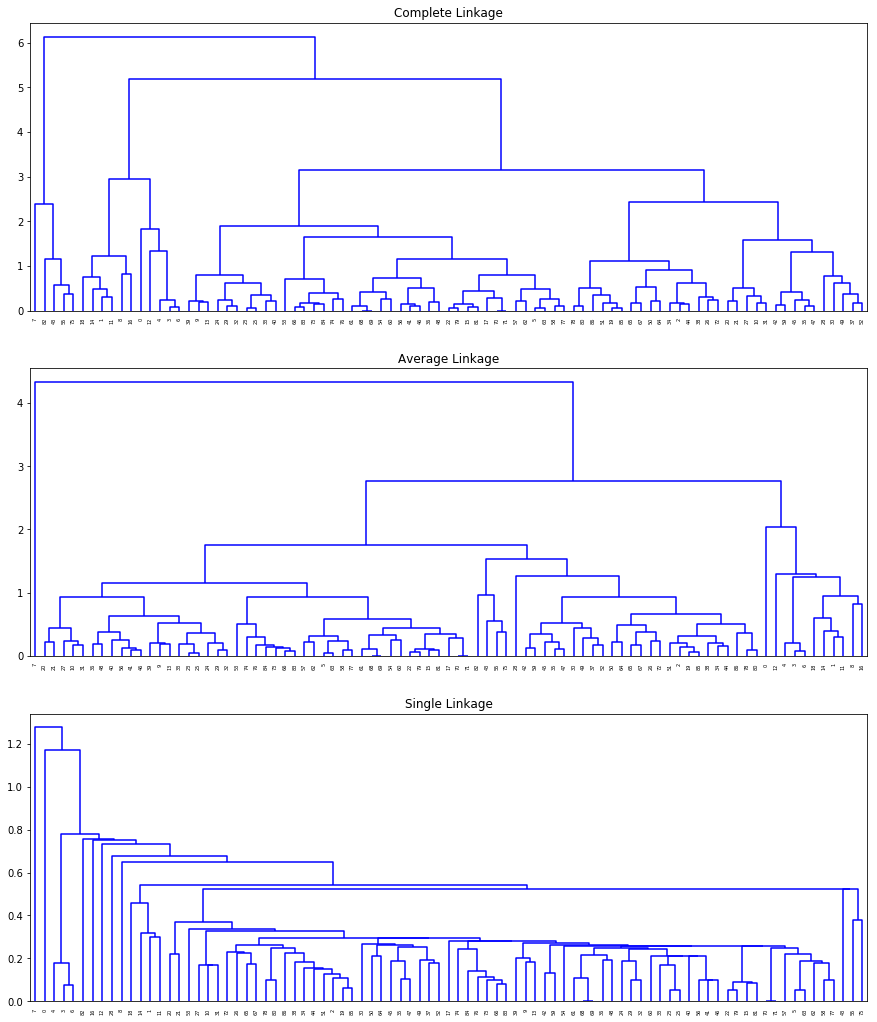

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(rb_scaled), hierarchy.average(rb_scaled), hierarchy.single(rb_scaled)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage')

### Examining the cuts

#### Cluster assignments for complete linkage

In [18]:
cuts1 = hierarchy.cut_tree(hierarchy.complete(rb_scaled), n_clusters=[2, 3])
cuts1DF = pd.DataFrame(cuts1, columns = ['Two Clusters', 'Three Clusters'])
print(cuts1DF)

    Two Clusters  Three Clusters
0              0               0
1              0               0
2              0               1
3              0               0
4              0               0
5              0               1
6              0               0
7              1               2
8              0               0
9              0               1
10             0               1
11             0               0
12             0               0
13             0               1
14             0               0
15             0               1
16             0               0
17             0               1
18             0               0
19             0               1
20             0               1
21             0               1
22             0               1
23             0               1
24             0               1
25             0               1
26             0               1
27             0               1
28             0               1
29        

#### Cluster assignments for average linkage

In [19]:
cuts2 = hierarchy.cut_tree(hierarchy.average(rb_scaled), n_clusters=[2, 3])
cuts2DF = pd.DataFrame(cuts2, columns = ['Two Clusters', 'Three Clusters'])
print(cuts2DF)

    Two Clusters  Three Clusters
0              0               0
1              0               0
2              0               1
3              0               0
4              0               0
5              0               1
6              0               0
7              1               2
8              0               0
9              0               1
10             0               1
11             0               0
12             0               0
13             0               1
14             0               0
15             0               1
16             0               0
17             0               1
18             0               0
19             0               1
20             0               1
21             0               1
22             0               1
23             0               1
24             0               1
25             0               1
26             0               1
27             0               1
28             0               1
29        

#### Cluster assignments for single linkage

In [20]:
cuts3 = hierarchy.cut_tree(hierarchy.single(rb_scaled), n_clusters=[2, 3])
cuts3DF = pd.DataFrame(cuts3, columns = ['Two Clusters', 'Three Clusters'])
print(cuts3DF)

    Two Clusters  Three Clusters
0              0               0
1              0               1
2              0               1
3              0               1
4              0               1
5              0               1
6              0               1
7              1               2
8              0               1
9              0               1
10             0               1
11             0               1
12             0               1
13             0               1
14             0               1
15             0               1
16             0               1
17             0               1
18             0               1
19             0               1
20             0               1
21             0               1
22             0               1
23             0               1
24             0               1
25             0               1
26             0               1
27             0               1
28             0               1
29        

Even though it is evident that the algorithm splits the data at distinct points, the downside of hierarchical clustering is that it is hard to read and therefore harder to interpret. <br> Therefore, K-means clustering would be my prefered method of finding groups of similar items.  

## 3. Linear Regression Analysis
### Can we predict the ocular survival?

Based on the sample data and the clustering results, it would be interesting to find out if it is possible to predict how many years patients can expect to maintain their eyesight and ultimately, keep their eyes. Since the clustering results showed that age and ocular survival can be linked, we will consider only those two variables.

### Simple Linear Regression

The goal is to predict ocular survival based on the age at diagnosis.

In [21]:
rb2 = pd.read_csv('RB.csv').fillna(0)
y = rb2['ocular_survival']
X = rb2['age_diagnosis']

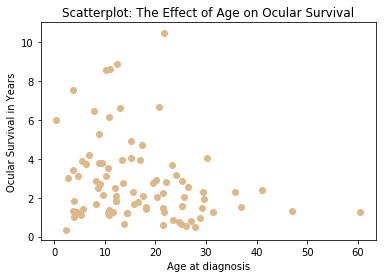

In [22]:
plt.scatter(X, y, color = 'burlywood')
plt.xlabel('Age at diagnosis')
plt.ylabel('Ocular Survival in Years')
plt.title('Scatterplot: The Effect of Age on Ocular Survival')
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(rb2, y, test_size=0.5, train_size = 0.5, random_state = 42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

train_explained = explained_variance_score(y_train, train_preds)  
test_explained = explained_variance_score(y_test, test_preds)

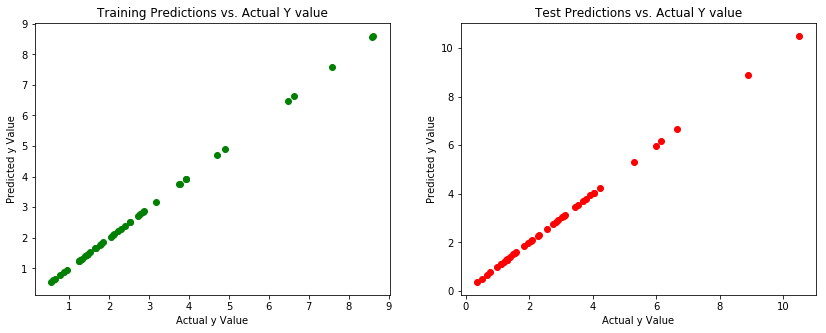

Training MSE: 1.2745320650015206e-28
Test MSE: 2.085840257838789e-28

Training R^2 score: 1.0
Test R^2 score: 1.0

Train Explained Variance Score: 1.0
Test Explained Variance Score: 1.0


In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(y_train, train_preds,color = 'g') 
ax1.set_title('Training Predictions vs. Actual Y value')
ax1.set_xlabel('Actual y Value')
ax1.set_ylabel('Predicted y Value')

ax2.scatter(y_test, test_preds,color = 'r') 
ax2.set_title('Test Predictions vs. Actual Y value')
ax2.set_xlabel('Actual y Value')
ax2.set_ylabel('Predicted y Value')

plt.show()

print('Training MSE: %s' % train_mse)
print('Test MSE: %s\n' %test_mse)
print('Training R^2 score: %s' %train_r2)
print('Test R^2 score: %s\n' %test_r2)
print('Train Explained Variance Score: %s' %train_explained)
print('Test Explained Variance Score: %s' %test_explained)

Since the training and test mean squared error is so low, and both training and testing R^2 score and explained variance score are perfect, it is interesting to create a residual plot to make sure that the residuals follow normal distribution with mean = 0 and variance = s^2.

Note that the linear regression model was trained using training data.


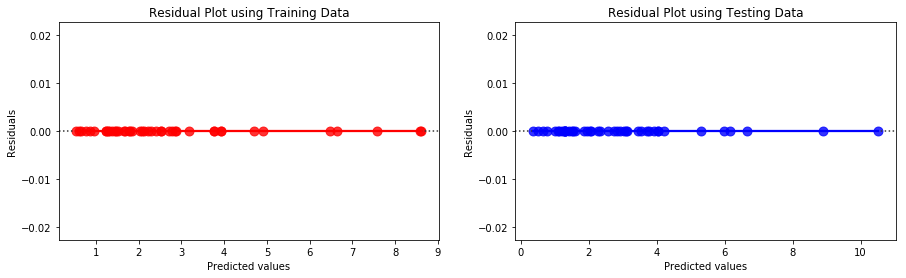

In [25]:
print('Note that the linear regression model was trained using training data.')
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.residplot(train_preds, y_train, lowess= True, color = 'r', scatter_kws={"s": 80}, ax=axes[0])
axes[0].set_title('Residual Plot using Training Data')
axes[0].set_xlabel('Predicted values')
axes[0].set_ylabel('Residuals')

sns.residplot(test_preds, y_test, lowess=True, color = 'b', scatter_kws={"s": 80}, ax = axes[1])
axes[1].set_title('Residual Plot using Testing Data')
axes[1].set_xlabel('Predicted values')
axes[1].set_ylabel('Residuals')
     
plt.show()

C:\Users\rapef\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


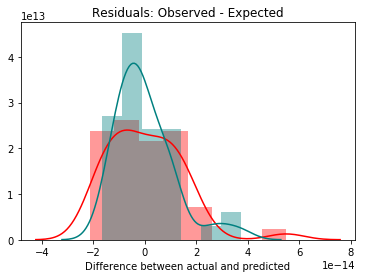

In [26]:
sns.distplot((y_test-test_preds),bins= 'auto', color = 'r')
sns.distplot((y_train-train_preds), bins = 'auto', color = 'teal')
plt.title('Residuals: Observed - Expected')
plt.xlabel('Difference between actual and predicted')
plt.show()

It is visible that the residuals follow normal distribution. <br>
Considering the results of linear regression, it can be concluded that it is possible to predict ocular survival based on the age of diagnosis. <br>
The prefect accuracy can be explained two-fold:
1. The data set is too small (only 87 data points) so that the model was overfitted. It would be interesting to conduct the same procedure with a larger data set to see if the same results would be expected.
2. Ocular survival is highly dependend on the age at diagnosis. With an earlier detection of disease, it is more likely to save a patient's vision. Therefore, just like mentioned in the previous section, it is recommended to seek a professional when signs of disease are noticable or when family history exists.

## 3. Classification
### Is it possible to predict the success of therapy? 
At the initial stages of treatment, not all the data is available to predict the success of therapy. Some clinical tests require long waiting times and in the case of retinal reattachment surgery, a variety of different features influence the success of treatment, some of which can't be determined readily. Even then, the outcome cannot be guaranteed because many other factors impact how a patient reacts to a certain treatment. More research in this field is needed. <br>
Using machine learning to "make sense" of the data at hand could improve diagnositics and treatment possibilities. <br>
Here, only some of features will be used to make predictions; those that doctors would have at hand. <br>
To measure success, I will consider both the maximal retinal reattachment and the final retinal detachment status, separately. Then, applying both logistic regression and gradient boost, the two models will be compared for accuracy.

In [27]:
#create new dataframe to avoid errors
rb3 = pd.read_csv('RB.csv').fillna(0)
rb3.head()

,age_diagnosis,sex,prior_treatment,family_history,lateral_RB,lateral_RD,max_RRA,final_RD_status,ocular_survival
0,21.67,1,1,0,2,1,2,2,10.51
1,12.93,1,0,0,1,0,1,1,6.64
2,26.03,0,0,0,2,1,0,0,0.55
3,10.30,1,0,0,1,1,2,2,8.58
4,12.40,1,0,0,1,0,2,2,8.88


In [28]:
features = rb3[['age_diagnosis', 'sex', 'family_history', 'prior_treatment', 'lateral_RB', 'lateral_RD']]
y1 = rb3['max_RRA']
y2 = rb3['final_RD_status']

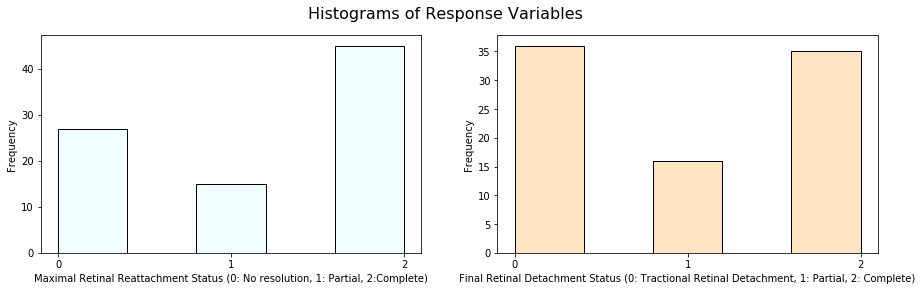

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

x = np.arange(0, 9, 0.25)

plt.suptitle('Histograms of Response Variables',fontsize=16)

axes[0].hist(y1, bins = 5, color = 'azure', edgecolor = 'black')
axes[0].set_xlabel('Maximal Retinal Reattachment Status (0: No resolution, 1: Partial, 2:Complete)')
axes[0].set_ylabel('Frequency')
axes[0].get_xaxis().set_ticks([0,1,2])

axes[1].hist(y2, bins = 5, color = 'bisque', edgecolor = 'black')
axes[1].set_xlabel('Final Retinal Detachment Status (0: Tractional Retinal Detachment, 1: Partial, 2: Complete)')
axes[1].set_ylabel('Frequency')
axes[1].get_xaxis().set_ticks([0,1,2])

plt.show()

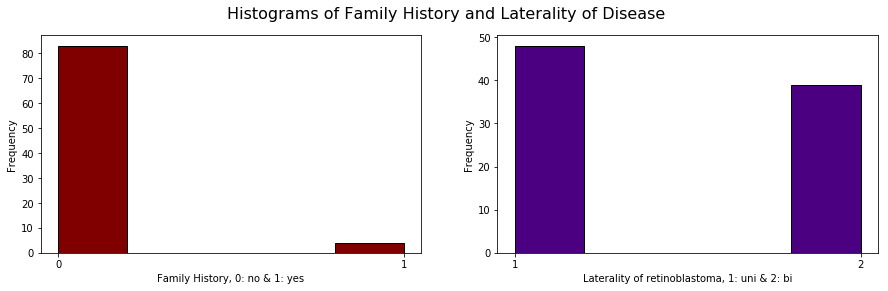

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

x = np.arange(0, 9, 0.25)
plt.suptitle('Histograms of Family History and Laterality of Disease', fontsize = 16)

axes[0].hist(rb3['family_history'], bins = 5, color = 'maroon', edgecolor = 'black')
axes[0].set_xlabel('Family History, 0: no & 1: yes')
axes[0].set_ylabel('Frequency')
axes[0].get_xaxis().set_ticks([0,1])

axes[1].hist(rb3['lateral_RB'], bins = 5, color = 'indigo', edgecolor = 'black')
axes[1].set_xlabel('Laterality of retinoblastoma, 1: uni & 2: bi')
axes[1].set_ylabel('Frequency')
axes[1].get_xaxis().set_ticks([1,2])

plt.show()

In [31]:
#create new columns for the diagram below
rb3['Treatment'] = rb3['prior_treatment'].replace([0, 1, 2, 3], ['None', 'Systemic Chemotherapy', 'Intra-arterial Chemotherapy', 'Bridge Chemotherapy'])                     
rb3['Sex'] = rb3['sex'].replace([0,1], ['Male', 'Female'])
rb3['Laterality of RD'] = rb3['lateral_RD'].replace([0,1], ['Right Eye', 'Left Eye'])

diagram = rb3[['Treatment', 'Sex', 'age_diagnosis', 'Laterality of RD']]

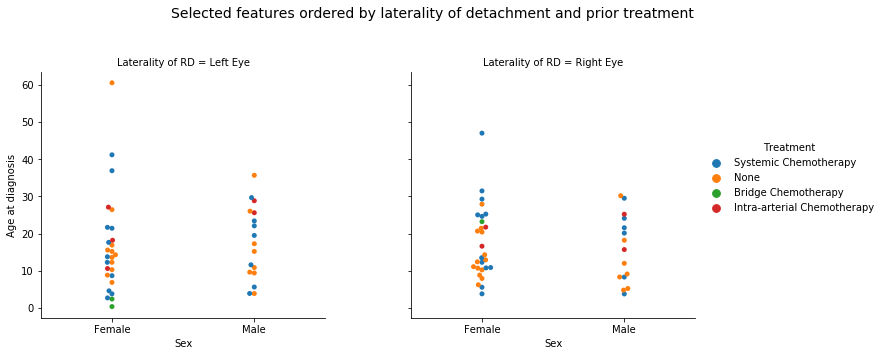

In [32]:
plot3 = sns.catplot(x = 'Sex', y = 'age_diagnosis', col = 'Laterality of RD', hue = 'Treatment', data = diagram, kind = 'swarm')
fig = plot3.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
plot3.set_axis_labels('Sex','Age at diagnosis')
fig.suptitle('Selected features ordered by laterality of detachment and prior treatment', fontsize = 14)
plt.show()

### Logistic Regression & Gradient Boosting 

Since there are only 87 data points in this set, I have decided to set the training size to 20% of the data. <br>
While both algorithms were tested using different ratios ranging from 0.1 to 0.5, it was found that 20% gave the best results (so the highest accuracy) and the training size of 17 was still large enough to avoid any unwanted behaviours.

In [33]:
features = rb3[['age_diagnosis', 'sex', 'family_history', 'prior_treatment', 'lateral_RB', 'lateral_RD']]
y1 = rb3['max_RRA']
y2 = rb3['final_RD_status']

X1_train, X1_test, y1_train, y1_test = train_test_split(features, y1, test_size=0.8, train_size = 0.2, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(features, y2, test_size=0.8, train_size = 0.2, random_state = 42)

#### Predicting Maximal Retinal Reattachment Status 

For maximal retinal reattachment status, there are three possible categorical values: <br>
    0: No resolution<br>
    1: Partial<br>
    2: Complete

In [34]:
logistic1 = LogisticRegression()
logistic1.fit(X1_train, y1_train)

preds_logistic1 = logistic1.predict(X1_test)
cm11 = confusion_matrix(y1_test, preds_logistic1)

cm_logistic1 = pd.DataFrame(cm11.T, index=['No resolution', 'Partial', 'Complete'], columns=['No resolution', 'Partial', 'Complete'])

In [35]:
boost1 = GradientBoostingClassifier(random_state=1)
boost1.fit(X1_train, y1_train)

preds_boost1 = boost1.predict(X1_test)
cm12 = confusion_matrix(y1_test, preds_boost1) 

cm_boost1 = pd.DataFrame(cm12.T, index=['No resolution', 'Partial', 'Complete'], columns=['No resolution', 'Partial', 'Complete'])

In [36]:
print('\t\tDisplaying Results for Maximal Retinal Reattachment Status\n')

print("\tUsing Logistic Regression\n")
print("Classification Report\n")
print(classification_report(y1_test, preds_logistic1, target_names = ['No resolution', 'Partial', 'Complete']))
print('Confusion Matrix\n')
print(cm_logistic1)
tree_logistic1 = accuracy_score(y1_test, preds_logistic1)
print('\nAccuracy %s\n' % tree_logistic1)


print("\n\tUsing Gradient Boost\n")
print("Classification Report\n")
print(classification_report(y1_test, preds_boost1, target_names = ['No resolution', 'Partial', 'Complete']))
print('Confusion Matrix\n')
print(cm_boost1)
tree_boost1 = accuracy_score(y1_test, preds_boost1)
print('\nAccuracy %s\n' % tree_boost1)

		Displaying Results for Maximal Retinal Reattachment Status

	Using Logistic Regression

Classification Report

               precision    recall  f1-score   support

No resolution       0.54      0.57      0.55        23
      Partial       0.00      0.00      0.00        13
     Complete       0.65      0.88      0.75        34

  avg / total       0.49      0.61      0.55        70

Confusion Matrix

               No resolution  Partial  Complete
No resolution             13        7         4
Partial                    0        0         0
Complete                  10        6        30

Accuracy 0.6142857142857143


	Using Gradient Boost

Classification Report

               precision    recall  f1-score   support

No resolution       0.47      0.35      0.40        23
      Partial       0.00      0.00      0.00        13
     Complete       0.58      0.82      0.68        34

  avg / total       0.44      0.51      0.46        70

Confusion Matrix

               No resoluti

C:\Users\rapef\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Looking at the results above, logistic regression performed better than gradient boost with accuracies of 61.43% and 51.43% respectively. However, I would conclude that, using this data set alone, neither algorithms would be suitable for clinical use. A bigger data set would be required to train the models accordingly to make inferences whether it is possible to predict the retinal reattachment status.

#### Predicting Final Retinal Detachment Status 
For final retinal detachment status, there are three possible categories as well:<br>
0: Tractional Retinal Detachment (abbreviated TRD)<br>
1: Partial<br>
2: Complete

In [37]:
logistic2 = LogisticRegression()
logistic2.fit(X2_train, y2_train)

preds_logistic2 = logistic2.predict(X2_test)
cm21 = confusion_matrix(y2_test, preds_logistic2)

cm_logistic2 = pd.DataFrame(cm21.T, index=['TRD', 'Partial', 'Complete'], columns=['TRD', 'Partial', 'Complete'])

In [38]:
boost2 = GradientBoostingClassifier(random_state=1)
boost2.fit(X2_train, y2_train)

preds_boost2 = boost2.predict(X2_test)
cm22 = confusion_matrix(y2_test, preds_boost2) 

cm_boost2 = pd.DataFrame(cm22.T, index=['TRD', 'Partial', 'Complete'], columns=['TRD', 'Partial', 'Complete'])

In [39]:
print('\t\tDisplaying Results for Final Retinal Detachment Status\n')
print('\tUsing Logistic Regression\n')
print("Classification Report\n")
print(classification_report(y2_test, preds_logistic2, target_names = ['TRD', 'Partial', 'Complete']))
print('Confusion Matrix\n')
print(cm_logistic2)
tree_logistic2 = accuracy_score(y2_test, preds_logistic2)
print('\nAccuracy %s\n' % tree_logistic2)

print("\n\tUsing Gradient Boost\n")
print("Classification Report\n")
print(classification_report(y2_test, preds_boost2, target_names = ['TRD', 'Partial', 'Complete']))
print('Confusion Matrix\n')
print(cm_boost2)
tree_boost2 = accuracy_score(y2_test, preds_boost2)
print('\nAccuracy %s\n' % tree_boost2)

		Displaying Results for Final Retinal Detachment Status

	Using Logistic Regression

Classification Report

             precision    recall  f1-score   support

        TRD       0.69      0.58      0.63        31
    Partial       0.25      0.08      0.12        12
   Complete       0.57      0.85      0.69        27

avg / total       0.57      0.60      0.57        70

Confusion Matrix

          TRD  Partial  Complete
TRD        18        4         4
Partial     3        1         0
Complete   10        7        23

Accuracy 0.6


	Using Gradient Boost

Classification Report

             precision    recall  f1-score   support

        TRD       0.45      0.32      0.38        31
    Partial       0.19      0.25      0.21        12
   Complete       0.34      0.41      0.37        27

avg / total       0.37      0.34      0.35        70

Confusion Matrix

          TRD  Partial  Complete
TRD        10        3         9
Partial     6        3         7
Complete   15        6    

Using final retinal detachment status as a measure of success, the models performed worse. Logistic regression still outperformed gradient boost with accuracies of 60% and 34.29% respectively. Based on the sample data, these results would not be safe enough to be used in a clinical setting and possible a larger data set would be needed. <br>

## 4. Conclusion

In this project, three different problems were considered.<br>
1. Using k-means clustering and hierarchical clustering, it was found that based on ocular survival and age at diagnosis, it is possible to group patients into distinct categories: those that are younger, had a higher ocular survival and were able to keep their eye sight for more years compared to the older group. Being able to group patients into one of the two categories would allow doctors to make adjustment to treatment and avoid unnecessary and painful medications. It would also open doors for better scheduling strategies at the hospital: young patients would be prioritized and receive e.g. clinal testings like MRT and PET/CT scans earlier since they are more likely to keep their vision.
2. Based on the clustering results, simple linear regression was applied to predict ocular survival based on the age at diagnosis with surprisinly high accuracy and low MSE. To verify the validity of the results, it would be interesting to apply this model to a larger data set. However, it can be concluded that these two features are highly affiliated with each other that it would be possible in real life to give an estimate of ocular survival. This knowledge could help patients prepare for the new situation. Losing your eye sight is something that is really hard to adjust to, and knowing "how much time you have left" would allow to arrange a variety of things that would be much harder once blind e.g. accomodation, school for the blind, guide dog.  
3. Lastly, logistic regression and gradient boost were used to predict the success of therapy. Success was measured using two parametres - maximal retinal reattachment and final retinal detachment status. Out of the two, the models gave a better accuracy for maximal retinal reattachment. However, the accuracies were not high enough to be used in a clinical setting, but could be used to give an overview and compare different treatment options. Here, the predictors were used separately but for future projects, it would be interesting to combine these two measures to see if we can detect an increase in accuracy.

Overall, it was an interesting project with a lot of future potential. Health care would benefit tremendously from machine learning algorithms in a range of ways from better treatments to more efficient scheduling.
Lastly, I want to stress that the topic of retinoblastoma is a very complicated with different interplaying factors that are often hard to predict. More research is needed to help patients and allow for higher ocular survival rates.

## 5. References

1. Rowlands, M. A., Mondesire-Crump, I., Levin, A., Mauguen, A., Francis, J. H., Dunkel, I. J., ... & Abramson, D. H. (2018). Total retinal detachments due to retinoblastoma: Outcomes following intra-arterial chemotherapy/ophthalmic artery chemosurgery. PloS one, 13(4), e0195395.
2. Dataset: https://figshare.com/articles/Total_retinal_detachments_due_to_retinoblastoma_Outcomes_following_intra-arterial_chemotherapy_ophthalmic_artery_chemosurgery/6191927
3. World Health Organization. (2014). Retinoblastoma - Review of Cancer Medicines on the WHO List of Essential Medicines [PDF]. Retrieved from http://www.who.int/selection_medicines/committees/expert/20/applications/Retinoblastoma.pdf